In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

### AMH Copula
$$ f(\theta) = \tau $$


$$ \tau = \frac{3 \theta - 2}{3 \theta} - \frac{2(1-\theta)^2 ln(1-\theta)}{3\theta^2} $$

Reference: http://www.m-hikari.com/ams/ams-2010/ams-13-16-2010/kumarAMS13-16-2010.pdf

$$ f(\tau) = \theta $$

In [3]:
def amh_theta_to_tau(theta):
    if isinstance(theta, float):
        if theta == 0:
            return 0
    f1 = (3*theta - 2) / (3*theta)
    f2 = (2*np.power(1-theta,2)*np.log(1-theta))/(3*np.power(theta,2))
    return f1 - f2

In [4]:
eps = 0.01
t1 = np.linspace(-1+eps, -eps, 101)
t2 = np.linspace(eps, 1-eps, 101)

<IPython.core.display.Javascript object>


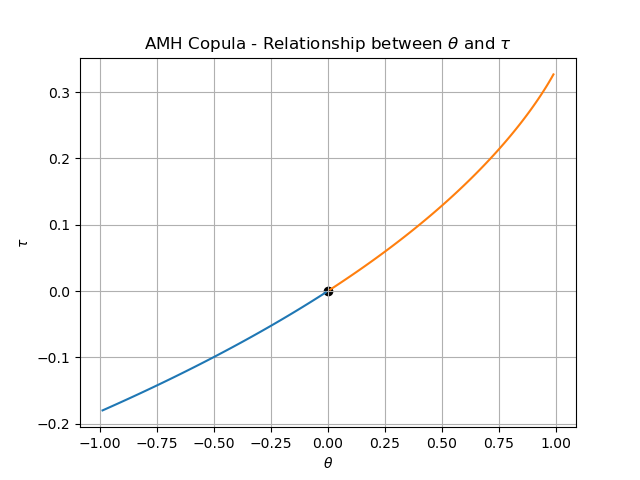

In [5]:
# Plot it
plt.figure()
plt.plot(t1, amh_theta_to_tau(t1))
plt.plot(t2, amh_theta_to_tau(t2))
plt.scatter([0], [0], marker='o', color='k')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\tau$')
plt.title(r'AMH Copula - Relationship between $\theta$ and $\tau$')
plt.grid()

### Objective Function
$$ \tau = \frac{3 \theta - 2}{3 \theta} - \frac{2(1-\theta)^2 ln(1-\theta)}{3\theta^2} $$

$$ \tau - \left( \frac{3 \theta - 2}{3 \theta} - \frac{2(1-\theta)^2 ln(1-\theta)}{3\theta^2} \right) = 0 $$
$$ O = \left[ \tau - \left( \frac{3 \theta - 2}{3 \theta} - \frac{2(1-\theta)^2 ln(1-\theta)}{3\theta^2} \right) \right]^2$$

In [6]:
def amh_tau_to_theta(theta, tau):
    if theta == 0:
        return 0
    f1 = (3*theta - 2) / (3*theta)
    f2 = (2*np.power(1-theta,2) * np.log(1-theta))/(3*np.power(theta,2))
    expression = tau - (f1 - f2)
    
    loss = np.power(expression, 2)
    
    return loss

In [7]:
tau1 = 0.2
theta_actual1 = minimize_scalar(amh_tau_to_theta, args=(tau1,), 
                                method='Bounded',
                                bounds=(0.001,0.99))
print(theta_actual1)

     fun: 2.2568605865825805e-15
 message: 'Solution found.'
    nfev: 10
     nit: 10
  status: 0
 success: True
       x: 0.7134896576481754


In [8]:
tau2 = -0.1
theta_actual2 = minimize_scalar(amh_tau_to_theta, args=(tau2,), 
                method='Bounded',
                bounds=(-0.99,-0.001))
print(theta_actual2)

     fun: 7.349962108734268e-14
 message: 'Solution found.'
    nfev: 9
     nit: 9
  status: 0
 success: True
       x: -0.5030281522181177


<IPython.core.display.Javascript object>


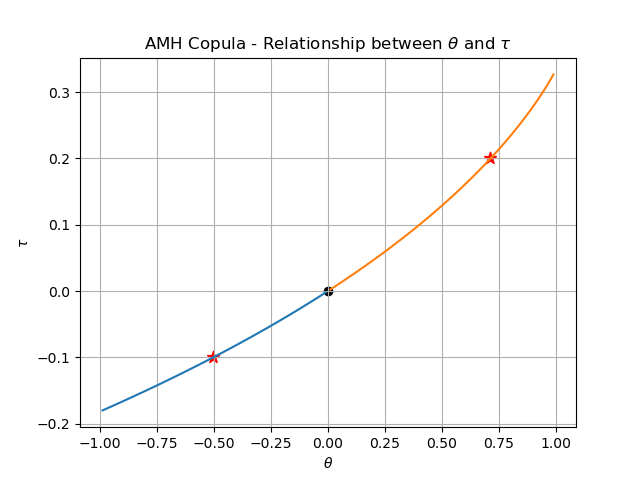

In [9]:
# Plot it
plt.figure()
plt.plot(t1, amh_theta_to_tau(t1))
plt.plot(t2, amh_theta_to_tau(t2))
plt.scatter([0], [0], marker='o', color='k')
plt.scatter([theta_actual1.x], [tau1], marker='*', color='r', s=80)
plt.scatter([theta_actual2.x], [tau2], marker='*', color='r', s=80)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\tau$')
plt.title(r'AMH Copula - Relationship between $\theta$ and $\tau$')
plt.grid()